<h1><center>Loan Eligibility Prediction - PreProcessing</center></h1>


#### Why we are taking up this project ?

- The primary source of profit for the banking sector is from loan interests. Hence,Banks invest a lot of time and money in analyzing a loan applicant’s profile and their repaying capacity before granting them a loan.
<br>
<br>
- Going through the profile of every applicant manually and assessing each applicant’s repaying capacity is highly tedious job, and that is why automating the entire process is necessary.
<br>
<br>
- To build such a predictive model, we need a data set, also known as training data. In today’s world, data can be stored in various database structures,MySQL, a fully-featured relational database, is a widely used.

#### What we will do ?
- In this project, we will build an automated machine learning model to predict repaying capacity of applicants by using MySQL as data source. 
- The GoogleCloud Platform(GCP) is used as the cloud platform to deploy the models in production.
- Before that we will use Jupyter notebook for Data preprocessing, model training and model testing.

In [1]:
# For numpy Arrays 
import numpy as np

# For using pandas DataFrame
import pandas as pd

# For plotting charts
import matplotlib.pyplot as plt
import seaborn as sns

# For plotting in the current window
%matplotlib inline

In [2]:
# Get multiple outputs in the same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# To supress future warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_colwidth',2000)
pd.options.display.float_format='{:.2f}'.format

**Loading the data using Pandas**

In [4]:
df = pd.read_csv('..\input\LoansTrainingSetV2.csv')

In [5]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,6cf51492-02a2-423e-b93d-676f05b9ad53,7c202b37-2add-44e8-9aea-d5b119aea935,Loan Refused,12232,Short Term,7280.00,< 1 year,Rent,46643.00,Debt Consolidation,777.39,18.00,10.00,12,0,6762,7946,0.00,0.00
1,552e7ade-4292-4354-9ff9-c48031697d72,e7217b0a-07ac-47dd-b379-577b5a35b7c6,Loan Refused,25014,Long Term,7330.00,10+ years,Home Mortgage,81099.00,Debt Consolidation,892.09,26.70,NaN,14,0,35706,77961,0.00,0.00
2,9b5e32b3-8d76-4801-afc8-d729d5a2e6b9,0a62fc41-16c8-40b5-92ff-9e4b763ce714,Loan Refused,16117,Short Term,7240.00,9 years,Home Mortgage,60438.00,Home Improvements,1244.02,16.70,32.00,11,1,11275,14815,1.00,0.00
3,5419b7c7-ac11-4be2-a8a7-b131fb6d6dbe,30f36c59-5182-4482-8bbb-5b736849ae43,Loan Refused,11716,Short Term,7400.00,3 years,Rent,34171.00,Debt Consolidation,990.94,10.00,NaN,21,0,7009,43533,0.00,0.00
4,1450910f-9495-4fc9-afaf-9bdf4b9821df,70c26012-bba5-42c0-8dcb-75295ada31bb,Loan Refused,9789,Long Term,6860.00,10+ years,Home Mortgage,47003.00,Home Improvements,503.71,16.70,25.00,13,1,16913,19553,1.00,0.00


In [6]:
df.tail()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
111102,503f01e2-c3c4-4b10-886e-f15de57b6f1a,27a17610-1d8c-48a7-b0db-2d81a4fa099a,Loan Given,15654,Long Term,686.00,10+ years,Rent,43050.00,Debt Consolidation,889.69,14.10,49.00,18,0,14730,29757,0.00,0.00
111103,8af53bc0-56a4-4801-a960-52a46a90b33f,c124ca71-f42a-47cc-8ec2-236f7e9868a5,Loan Given,15237,Short Term,706.00,10+ years,Home Mortgage,60948.00,Debt Consolidation,700.90,15.90,48.00,11,0,17733,23060,0.00,0.00
111104,96efd327-f965-42ae-8b2b-d2555205ce19,7d959a54-8eeb-4df6-b582-046f889e4cff,Loan Given,10413,Short Term,719.00,5 years,Home Mortgage,66945.00,Debt Consolidation,1210.59,8.70,NaN,11,0,5205,6348,0.00,0.00
111105,ec19166c-70c5-4d49-adb6-fb3fc15024a2,5723fbf2-1ce8-4752-8bee-1bebf339f278,Loan Given,34447,Short Term,626.00,10+ years,Home Mortgage,78736.00,Debt Consolidation,1476.30,30.40,9.00,12,0,32318,37580,0.00,0.00
111106,f83ae0e1-bd30-46c7-9f72-f4f9fe2f36ca,74187e35-39c2-4010-ae0d-8bcd0544189e,Loan Given,9209,Long Term,708.00,< 1 year,Own Home,123454.00,Debt Consolidation,668.71,20.10,16.00,8,0,6835,9261,0.00,0.00


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111107 entries, 0 to 111106
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       111107 non-null  object 
 1   Customer ID                   111107 non-null  object 
 2   Loan Status                   111107 non-null  object 
 3   Current Loan Amount           111107 non-null  int64  
 4   Term                          111107 non-null  object 
 5   Credit Score                  89769 non-null   float64
 6   Years in current job          106414 non-null  object 
 7   Home Ownership                111107 non-null  object 
 8   Annual Income                 89769 non-null   float64
 9   Purpose                       111107 non-null  object 
 10  Monthly Debt                  111107 non-null  object 
 11  Years of Credit History       111107 non-null  float64
 12  Months since last delinquent  52104 non-null

**Checking & cleaning duplicate records**

In [8]:
df.duplicated().sum()

5869

In [9]:
df.drop_duplicates(subset='Loan ID', keep='first', inplace=True, ignore_index=True)

In [10]:
df.duplicated().sum()

0

In [11]:
df.shape

(88910, 19)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88910 entries, 0 to 88909
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan ID                       88910 non-null  object 
 1   Customer ID                   88910 non-null  object 
 2   Loan Status                   88910 non-null  object 
 3   Current Loan Amount           88910 non-null  int64  
 4   Term                          88910 non-null  object 
 5   Credit Score                  67572 non-null  float64
 6   Years in current job          85093 non-null  object 
 7   Home Ownership                88910 non-null  object 
 8   Annual Income                 67572 non-null  float64
 9   Purpose                       88910 non-null  object 
 10  Monthly Debt                  88910 non-null  object 
 11  Years of Credit History       88910 non-null  float64
 12  Months since last delinquent  40404 non-null  float64
 13  N

**Analyzing Missing Values**

In [13]:
df.isnull().sum()

Loan ID                             0
Customer ID                         0
Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    21338
Years in current job             3817
Home Ownership                      0
Annual Income                   21338
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    48506
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 0
Bankruptcies                      192
Tax Liens                           8
dtype: int64

**Plotting Loan Status Distribution**

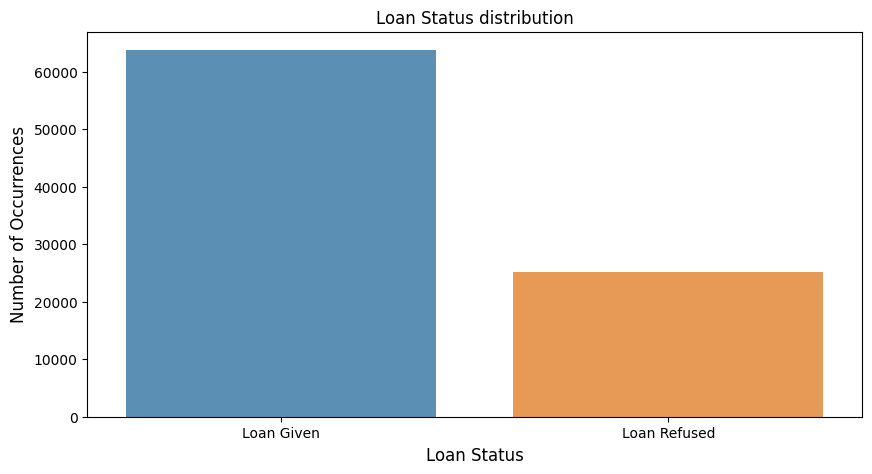

In [14]:
loan_status=df["Loan Status"].value_counts() 

plt.figure(figsize=(10,5))
sns.barplot(x=loan_status.index, y=loan_status.values, alpha=0.8)
plt.title('Loan Status distribution')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Loan Status', fontsize=12)
plt.show();

**Visualizing and Analyzing Current Loan Amount**

In [15]:
df['Current Loan Amount'].describe()

count      88910.00
mean    14338784.86
std     35029958.37
min          491.00
25%         8283.00
50%        14355.00
75%        24485.00
max     99999999.00
Name: Current Loan Amount, dtype: float64

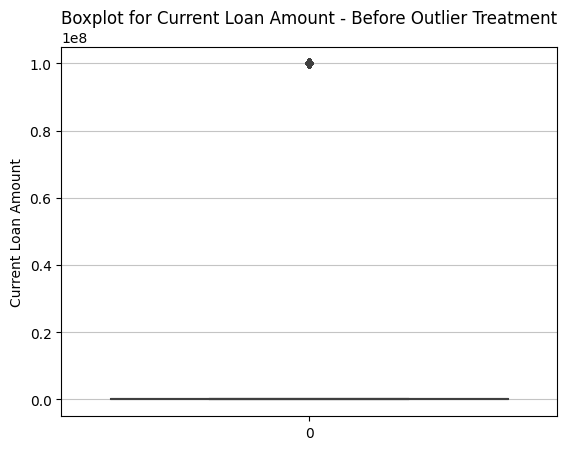

In [16]:
sns.boxplot(df['Current Loan Amount'])
plt.title('Boxplot for Current Loan Amount - Before Outlier Treatment')
plt.ylabel('Current Loan Amount')
plt.grid(axis='y', alpha=0.75);

In [17]:
def get_outlier_limits(data):
    sorted(data)
    Q1 = data.min()
    Q3 = data.quantile(0.90)
    IQR = Q3 - Q1
    lower_limit = Q1 - (1.5 * IQR)
    upper_limit = Q3 + (1.5 * IQR)
    
    return lower_limit, upper_limit

In [18]:
clist = ['Current Loan Amount']
for col in clist:
    lval, hval = get_outlier_limits(df[col])
    df[col] = np.where(df[col] >hval, hval, df[col])
    df[col] = np.where(df[col] <lval, lval, df[col])

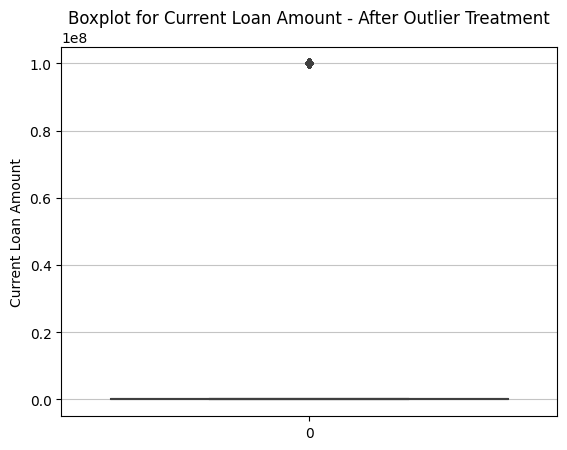

In [19]:
sns.boxplot(df['Current Loan Amount'])
plt.title('Boxplot for Current Loan Amount - After Outlier Treatment')
plt.ylabel('Current Loan Amount')
plt.grid(axis='y', alpha=0.75);

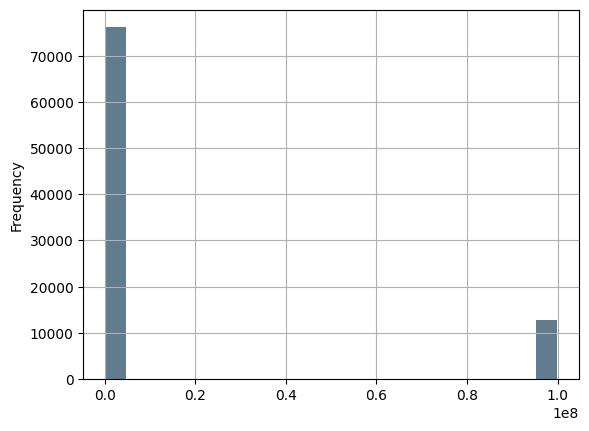

In [20]:
temp=df['Current Loan Amount'][df['Current Loan Amount']!='NaN']
temp.describe()
temp.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e');

**Visualizing and Analyzing Term**

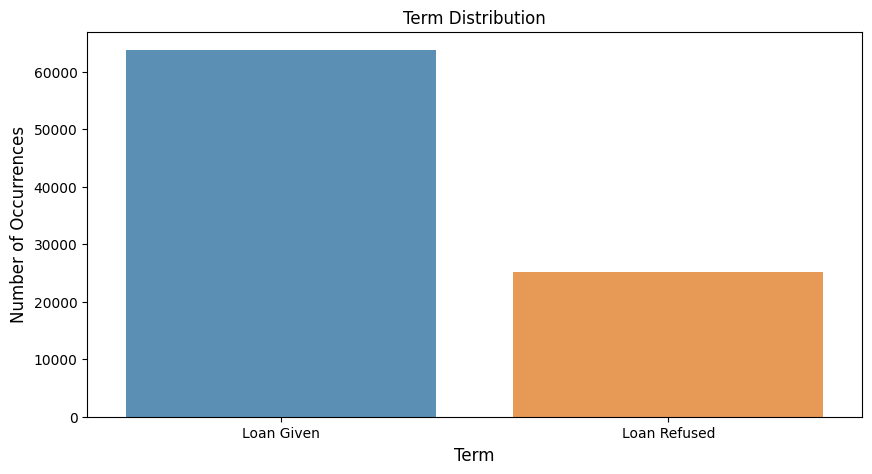

In [21]:
term_counts=df["Loan Status"].value_counts() 

plt.figure(figsize=(10,5))
sns.barplot(x=term_counts.index, y=term_counts.values, alpha=0.8)
plt.title('Term Distribution')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Term', fontsize=12)
plt.show();

**Visualizing and Analyzing Credit Score**

In [22]:
df['Credit Score'].describe()

count   67572.00
mean     1199.20
std      1680.81
min       585.00
25%       714.00
50%       733.00
75%       744.00
max      7510.00
Name: Credit Score, dtype: float64

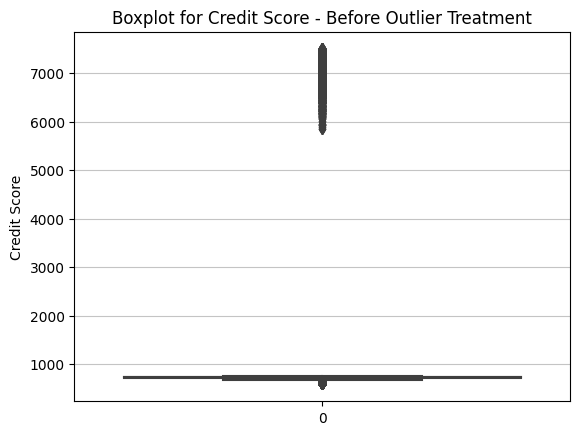

In [23]:
sns.boxplot(df['Credit Score'])
plt.title('Boxplot for Credit Score - Before Outlier Treatment')
plt.ylabel('Credit Score')
plt.grid(axis='y', alpha=0.75);

In [24]:
clist = ['Credit Score']
for col in clist:
    lval, hval = get_outlier_limits(df[col])
    df[col] = np.where(df[col] >hval, hval, df[col])
    df[col] = np.where(df[col] <lval, lval, df[col])

In [25]:
## Updating the Missing Values to median
df['Credit Score'] = df['Credit Score'].fillna(df['Credit Score'].median())

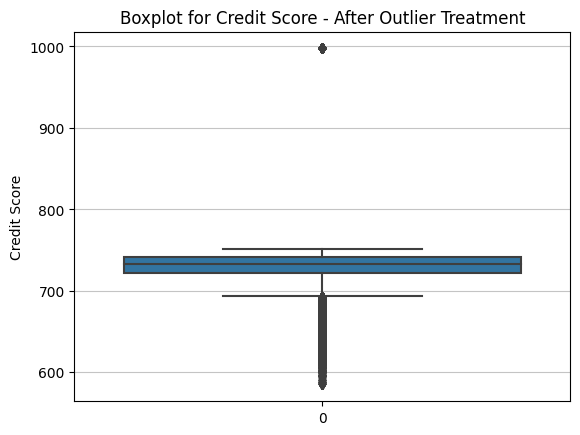

In [26]:
sns.boxplot(df['Credit Score'])
plt.title('Boxplot for Credit Score - After Outlier Treatment')
plt.ylabel('Credit Score')
plt.grid(axis='y', alpha=0.75);

**Visualizing and Analyzing - Home Ownership**

In [27]:
df['Home Ownership'].unique()

array(['Rent', 'Home Mortgage', 'Own Home', 'HaveMortgage'], dtype=object)

In [28]:
df['Home Ownership']=df['Home Ownership'].str.replace('HaveMortgage', 'Home Mortgage', regex=True)
df['Home Ownership'].unique()

array(['Rent', 'Home Mortgage', 'Own Home'], dtype=object)

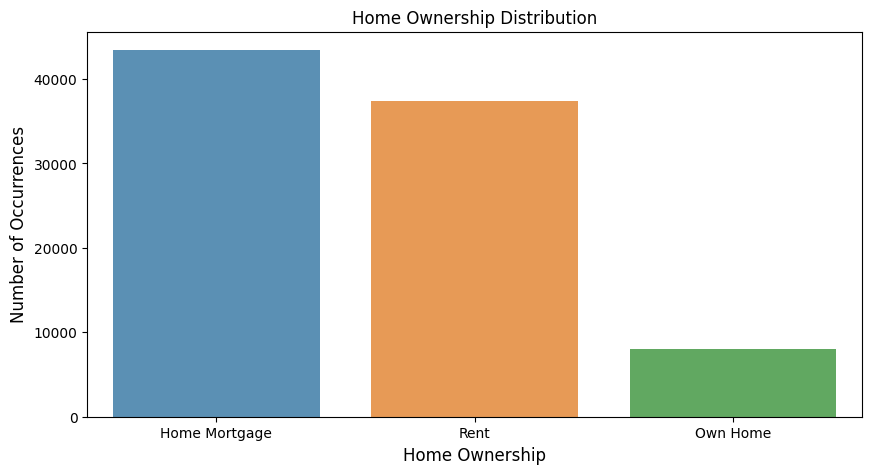

In [29]:
ownership_counts=df['Home Ownership'].value_counts() 

plt.figure(figsize=(10,5))
sns.barplot(x=ownership_counts.index, y=ownership_counts.values, alpha=0.8)
plt.title('Home Ownership Distribution')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Home Ownership', fontsize=12)
plt.show();

**Visualizing and Analyzing - Annual Income**

In [30]:
df['Annual Income'].describe()

count     67572.00
mean      72345.75
std       58361.01
min        4033.00
25%       44586.00
50%       61494.00
75%       86750.25
max     8713547.00
Name: Annual Income, dtype: float64

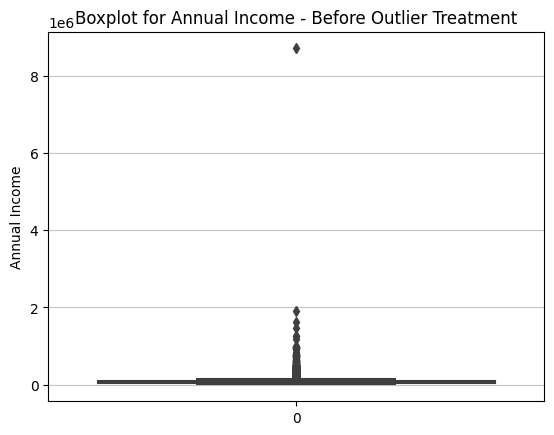

In [31]:
sns.boxplot(df['Annual Income'])
plt.title('Boxplot for Annual Income - Before Outlier Treatment')
plt.ylabel('Annual Income')
plt.grid(axis='y', alpha=0.75);

In [32]:
clist = ['Annual Income']
for col in clist:
    lval, hval = get_outlier_limits(df[col])
    df[col] = np.where(df[col] >hval, hval, df[col])
    df[col] = np.where(df[col] <lval, lval, df[col])

In [33]:
## Updating the Missing Values to median
df['Annual Income'] = df['Annual Income'].fillna(df['Annual Income'].median())

In [34]:
df['Annual Income'].isna().sum()

0

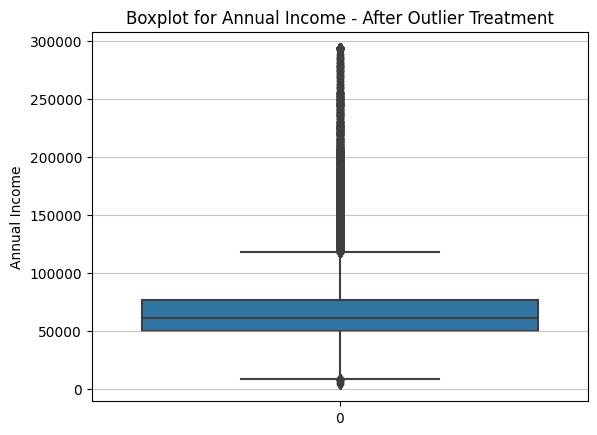

In [35]:
sns.boxplot(df['Annual Income'])
plt.title('Boxplot for Annual Income - After Outlier Treatment')
plt.ylabel('Annual Income')
plt.grid(axis='y', alpha=0.75);

**Visualizing and Analyzing - Purpose**

In [36]:
df['Purpose'].value_counts()

Debt Consolidation      70447
Home Improvements        5206
other                    4917
Other                    2850
Business Loan            1328
Buy a Car                1196
Medical Bills             955
Buy House                 559
Take a Trip               454
major_purchase            344
small_business            248
moving                    124
wedding                    99
Educational Expenses       92
vacation                   82
renewable_energy            9
Name: Purpose, dtype: int64

In [37]:
df['Purpose']=df['Purpose'].str.replace('Other', 'other', regex=True)

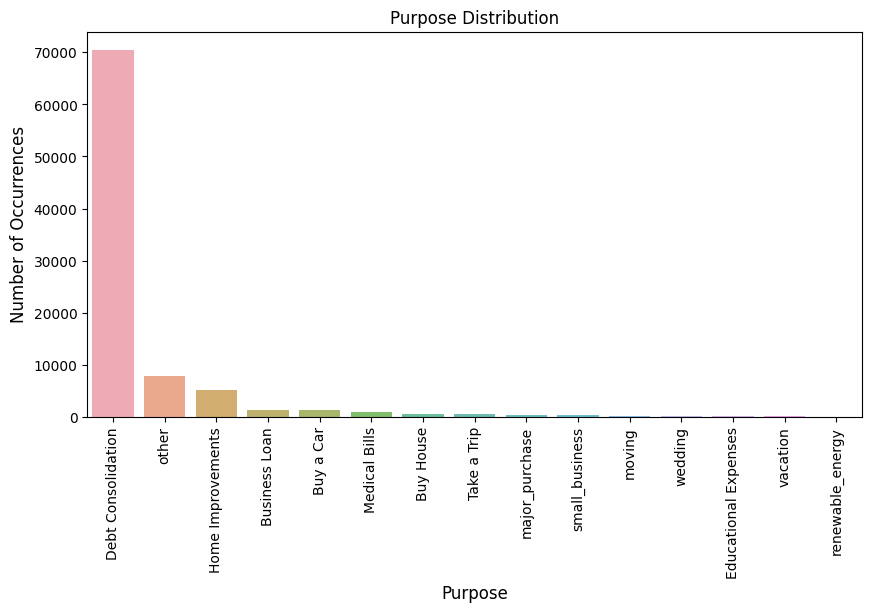

In [38]:
purpose_counts=df['Purpose'].value_counts() 

plt.figure(figsize=(10,5))
sns.barplot(x=purpose_counts.index, y=purpose_counts.values, alpha=0.8)
plt.title('Purpose Distribution')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Purpose', fontsize=12)
plt.xticks(rotation=90)
plt.show();

**Visualizing and Analyzing - Monthly Debt**

In [39]:
df['Monthly Debt'].describe()

count     88910
unique    76609
top           0
freq         55
Name: Monthly Debt, dtype: object

In [40]:
df['Monthly Debt'] = df['Monthly Debt'].str.replace('$', '', regex=True)
df['Monthly Debt'] = df['Monthly Debt'].str.replace(',', '', regex=True)
df['Monthly Debt'] = df['Monthly Debt'].str.lstrip()
df['Monthly Debt'] = df['Monthly Debt'].str.rstrip()

In [41]:
df['Monthly Debt']=df['Monthly Debt'].astype(float)

In [42]:
df['Monthly Debt'].isnull().sum()

23374

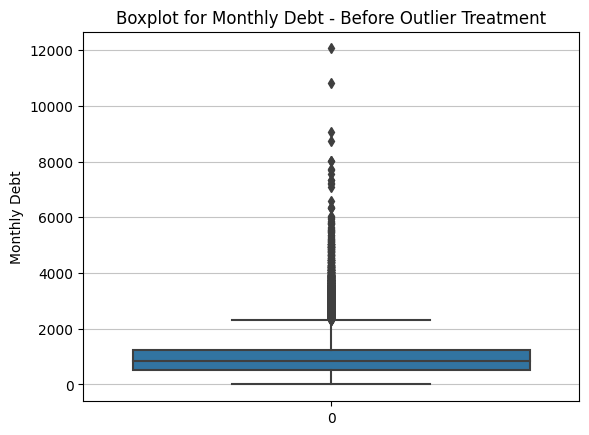

In [43]:
sns.boxplot(df['Monthly Debt'])
plt.title('Boxplot for Monthly Debt - Before Outlier Treatment')
plt.ylabel('Monthly Debt')
plt.grid(axis='y', alpha=0.75);

In [44]:
df['Monthly Debt'].describe()

count   65536.00
mean      962.41
std       632.80
min         0.00
25%       532.25
50%       843.77
75%      1251.34
max     12055.68
Name: Monthly Debt, dtype: float64

In [45]:
df['Monthly Debt'] = df['Monthly Debt'].fillna(df['Monthly Debt'].median())

In [46]:
clist = ['Monthly Debt']
for col in clist:
    lval, hval = get_outlier_limits(df[col])
    df[col] = np.where(df[col] >hval, hval, df[col])
    df[col] = np.where(df[col] <lval, lval, df[col])

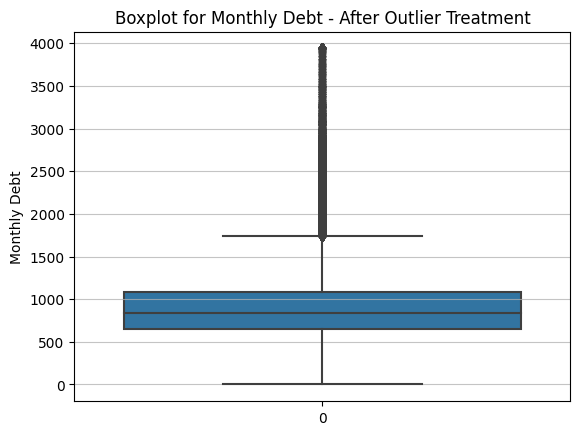

In [47]:
sns.boxplot(df['Monthly Debt'])
plt.title('Boxplot for Monthly Debt - After Outlier Treatment')
plt.ylabel('Monthly Debt')
plt.grid(axis='y', alpha=0.75);

**Visualizing and Analyzing - Years in current job**

In [48]:
df['Years in current job'].value_counts()

10+ years    27410
2 years       8187
< 1 year      7312
3 years       7263
5 years       6084
1 year        5765
4 years       5474
6 years       5095
7 years       4943
8 years       4098
9 years       3462
Name: Years in current job, dtype: int64

In [49]:
df['Years in current job'] = df['Years in current job'].str.replace('years', '', regex=True)
df['Years in current job'] = df['Years in current job'].str.replace('year', '', regex=True)
df['Years in current job'] = df['Years in current job'].str.replace('+', '', regex=True)
df['Years in current job'] = df['Years in current job'].str.replace('<', '', regex=True)
df['Years in current job'] = df['Years in current job'].str.replace('+', '', regex=True)
df['Years in current job'] = df['Years in current job'].str.lstrip()
df['Years in current job'] = df['Years in current job'].str.rstrip()

In [50]:
df['Years in current job'].isnull().sum()

3817

In [51]:
df['Years in current job'] = df['Years in current job'].fillna(df['Years in current job'].median())
df['Years in current job'] = df['Years in current job'].astype(int)

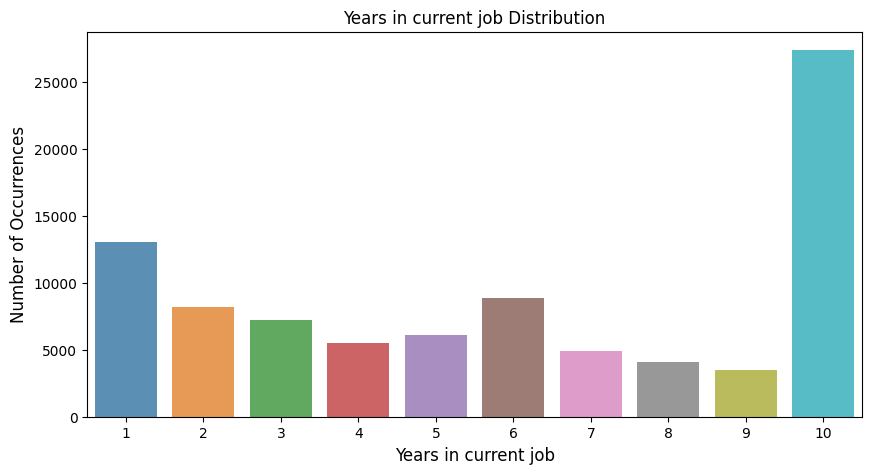

In [52]:
current_job_counts=df['Years in current job'].value_counts() 

plt.figure(figsize=(10,5))
sns.barplot(x=current_job_counts.index, y=current_job_counts.values, alpha=0.8)
plt.title('Years in current job Distribution')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Years in current job', fontsize=12)
plt.show();

**Visualizing and Analyzing - Years of Credit History**

In [53]:
df['Years of Credit History'].isnull().sum()

0

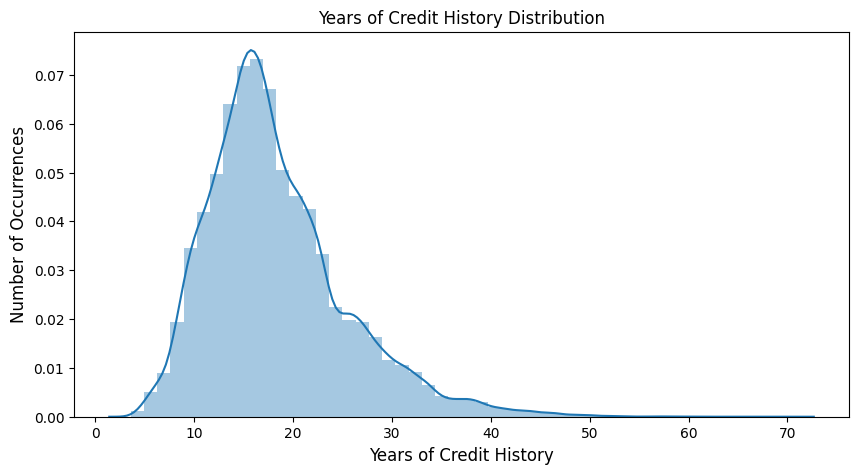

In [54]:
plt.figure(figsize=(10,5))
sns.distplot(df['Years of Credit History'])
plt.title('Years of Credit History Distribution')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Years of Credit History', fontsize=12)
plt.show();

**Visualizing and Analyzing - Months since last delinquent**

In [55]:
df['Months since last delinquent'].isnull().sum()

48506

In [56]:
df['Months since last delinquent'].describe()

count   40404.00
mean       35.08
std        22.01
min         0.00
25%        16.00
50%        32.00
75%        51.00
max       176.00
Name: Months since last delinquent, dtype: float64

In [57]:
df['Months since last delinquent'] = df['Months since last delinquent'].fillna(df['Months since last delinquent'].median())

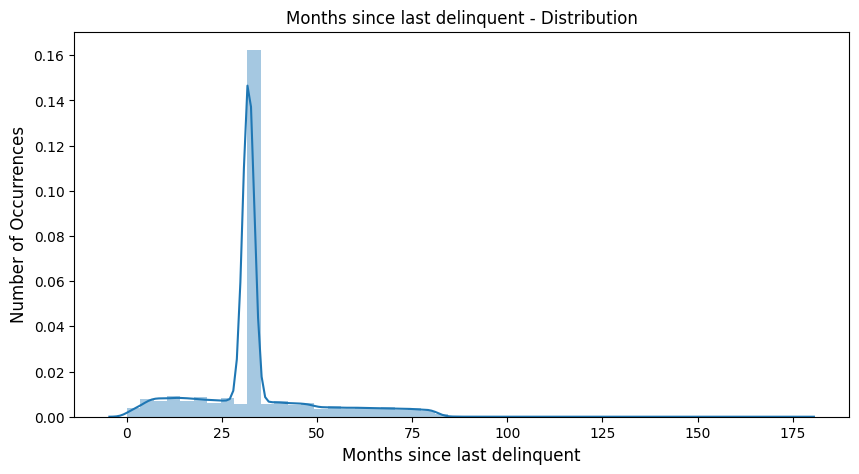

In [58]:
plt.figure(figsize=(10,5))
sns.distplot(df['Months since last delinquent'])
plt.title('Months since last delinquent - Distribution')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Months since last delinquent', fontsize=12)
plt.show();

**Visualizing and Analyzing - Number of Open Accounts**

In [59]:
df['Number of Open Accounts'].describe()

count   88910.00
mean       11.11
std         4.98
min         0.00
25%         8.00
50%        10.00
75%        14.00
max        76.00
Name: Number of Open Accounts, dtype: float64

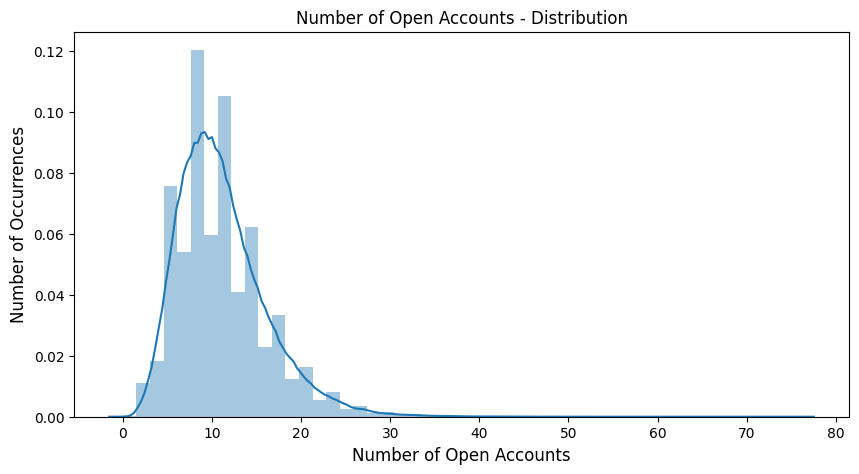

In [60]:
plt.figure(figsize=(10,5))
sns.distplot(df['Number of Open Accounts'])
plt.title('Number of Open Accounts - Distribution')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Number of Open Accounts', fontsize=12)
plt.show();

**Visualizing and Analyzing - Number of Credit Problems**

In [61]:
df['Number of Credit Problems'].describe() 

count   88910.00
mean        0.16
std         0.47
min         0.00
25%         0.00
50%         0.00
75%         0.00
max        15.00
Name: Number of Credit Problems, dtype: float64

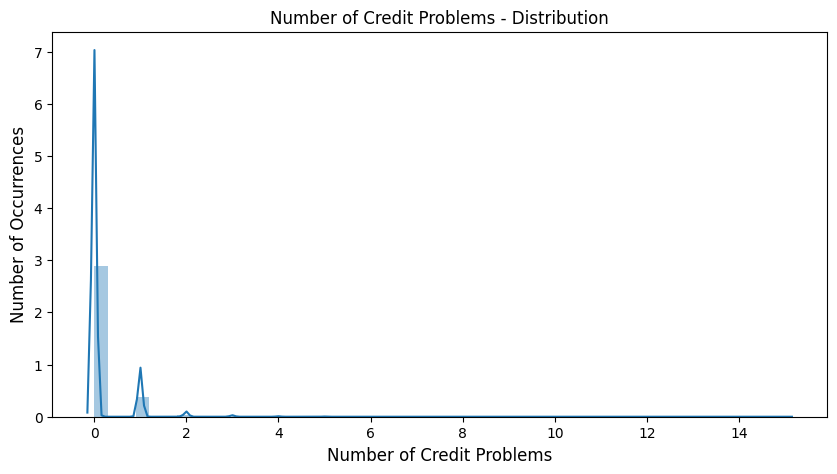

In [62]:
plt.figure(figsize=(10,5))
sns.distplot(df['Number of Credit Problems'])
plt.title('Number of Credit Problems - Distribution')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Number of Credit Problems', fontsize=12)
plt.show();

**Visualizing and Analyzing - Current Credit Balance**

In [63]:
df['Current Credit Balance'].describe()

count     88910.00
mean      15435.93
std       19658.73
min           0.00
25%        5949.00
50%       11039.00
75%       19301.00
max     1730472.00
Name: Current Credit Balance, dtype: float64

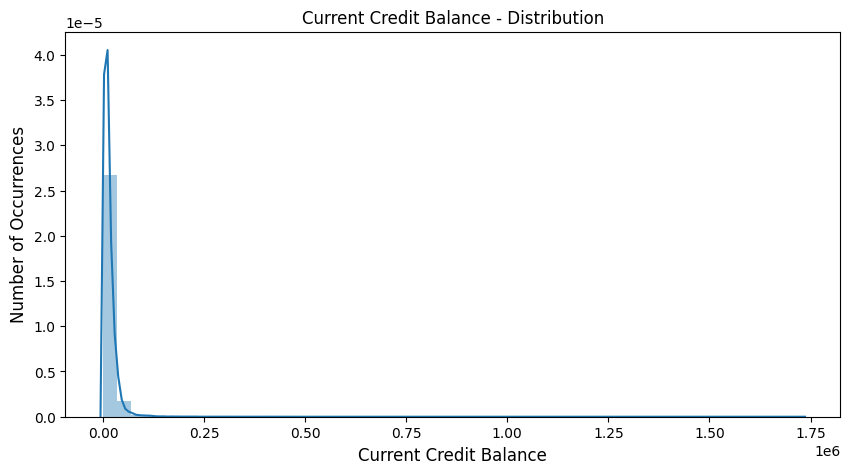

In [64]:
plt.figure(figsize=(10,5))
sns.distplot(df['Current Credit Balance'])
plt.title('Current Credit Balance - Distribution')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Current Credit Balance', fontsize=12)
plt.show();

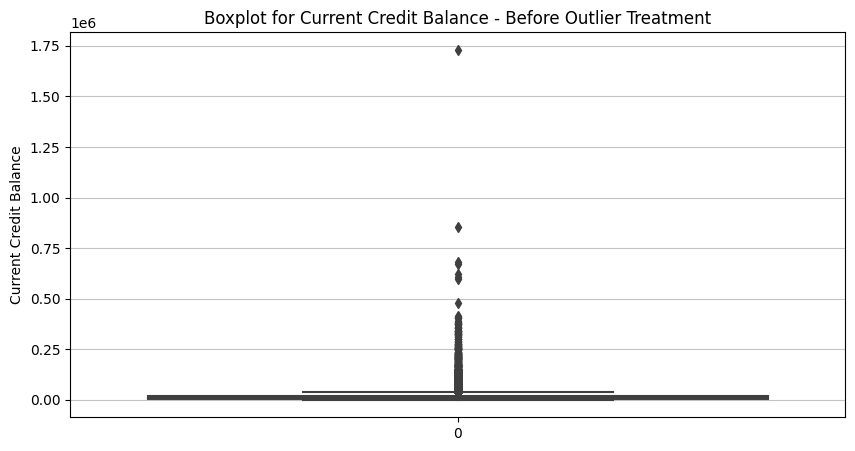

In [65]:
plt.figure(figsize=(10,5))
sns.boxplot(df['Current Credit Balance'])
plt.title('Boxplot for Current Credit Balance - Before Outlier Treatment')
plt.ylabel('Current Credit Balance')
plt.grid(axis='y', alpha=0.75);

In [66]:
clist = ['Current Credit Balance']
for col in clist:
    lval, hval = get_outlier_limits(df[col])
    df[col] = np.where(df[col] >hval, hval, df[col])
    df[col] = np.where(df[col] <lval, lval, df[col])

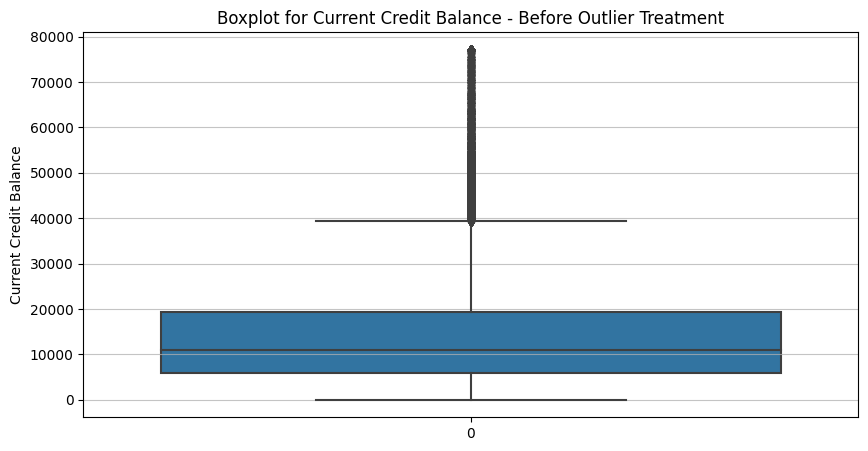

In [67]:
plt.figure(figsize=(10,5))
sns.boxplot(df['Current Credit Balance'])
plt.title('Boxplot for Current Credit Balance - Before Outlier Treatment')
plt.ylabel('Current Credit Balance')
plt.grid(axis='y', alpha=0.75);

**Visualizing and Analyzing - Maximum Open Credit**

In [68]:
df['Maximum Open Credit'].describe()

count     88910
unique    58216
top           0
freq        450
Name: Maximum Open Credit, dtype: object

In [69]:
df['Maximum Open Credit'].isnull().sum()

0

In [70]:
df['Maximum Open Credit']= df['Maximum Open Credit'].replace('#VALUE!', np.nan, regex=True)
df['Maximum Open Credit']= df['Maximum Open Credit'].fillna(df['Maximum Open Credit'].median())
df['Maximum Open Credit']= df['Maximum Open Credit'].astype(int)

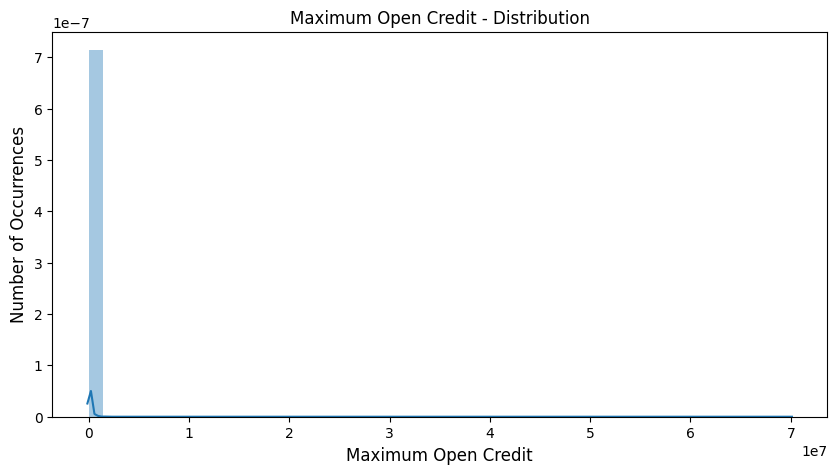

In [71]:
plt.figure(figsize=(10,5))
sns.distplot(df['Maximum Open Credit'])
plt.title('Maximum Open Credit - Distribution')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Maximum Open Credit', fontsize=12)
plt.show();

In [72]:
df['Maximum Open Credit'].describe()

count      88910.00
mean       35964.99
std       404175.97
min            0.00
25%        12775.25
50%        21781.00
75%        36367.00
max     69988086.00
Name: Maximum Open Credit, dtype: float64

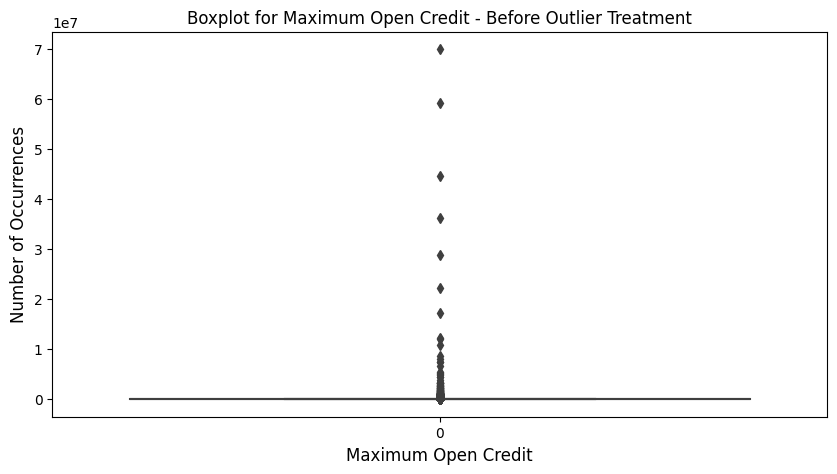

In [73]:
plt.figure(figsize=(10,5))
sns.boxplot(df['Maximum Open Credit'])
plt.title('Boxplot for Maximum Open Credit - Before Outlier Treatment')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Maximum Open Credit', fontsize=12)
plt.show();

In [74]:
clist = ['Maximum Open Credit']
for col in clist:
    lval, hval = get_outlier_limits(df[col])
    df[col] = np.where(df[col] >hval, hval, df[col])
    df[col] = np.where(df[col] <lval, lval, df[col])

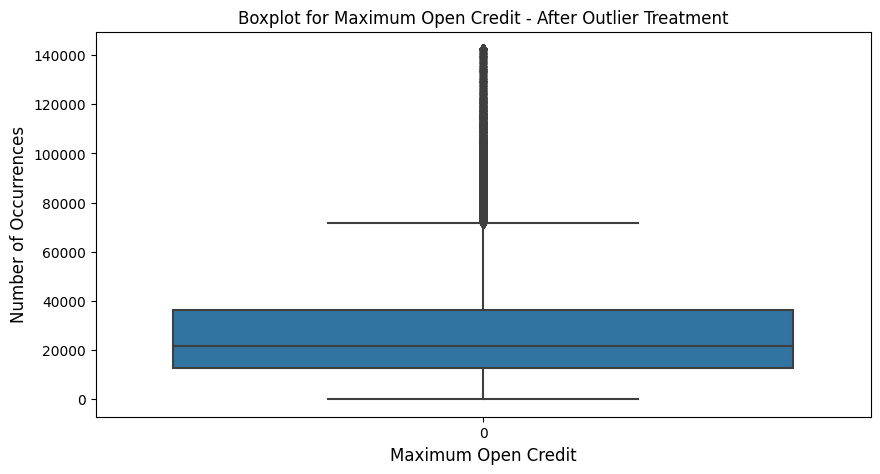

In [75]:
plt.figure(figsize=(10,5))
sns.boxplot(df['Maximum Open Credit'])
plt.title('Boxplot for Maximum Open Credit - After Outlier Treatment')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Maximum Open Credit', fontsize=12)
plt.show();

**Visualizing and Analyzing - Bankruptcies**

In [76]:
df['Bankruptcies'].describe()

count   88718.00
mean        0.11
std         0.34
min         0.00
25%         0.00
50%         0.00
75%         0.00
max         7.00
Name: Bankruptcies, dtype: float64

In [77]:
df['Bankruptcies'].unique()

array([ 0.,  1., nan,  2.,  4.,  3.,  5.,  7.,  6.])

In [78]:
df['Bankruptcies']=df['Bankruptcies'].fillna(df['Bankruptcies'].mode()[0])

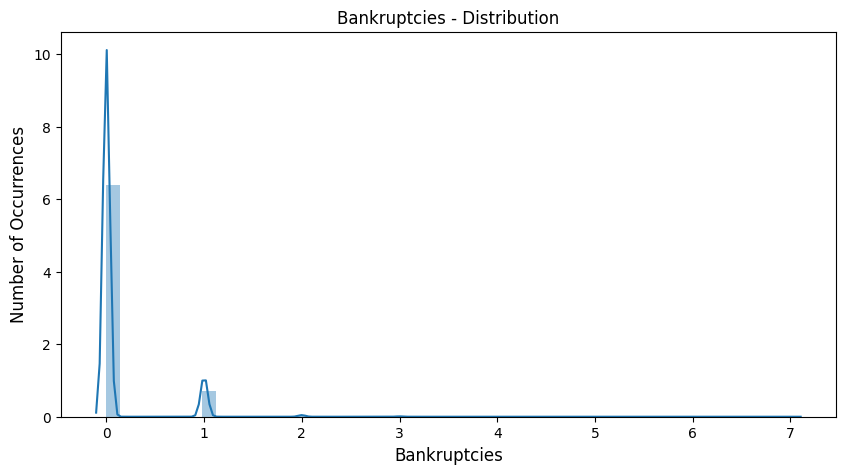

In [79]:
plt.figure(figsize=(10,5))
sns.distplot(df['Bankruptcies'])
plt.title('Bankruptcies - Distribution')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Bankruptcies', fontsize=12)
plt.show();

**Visualizing and Analyzing - Tax Liens**

In [80]:
df['Tax Liens'].describe()

count   88902.00
mean        0.03
std         0.26
min         0.00
25%         0.00
50%         0.00
75%         0.00
max        15.00
Name: Tax Liens, dtype: float64

In [81]:
df['Tax Liens'].unique()

array([ 0.,  5.,  2.,  1.,  3.,  7.,  6.,  4.,  9., nan,  8., 15., 10.,
       11.])

In [82]:
df['Tax Liens']=df['Tax Liens'].fillna(df['Tax Liens'].mode()[0])

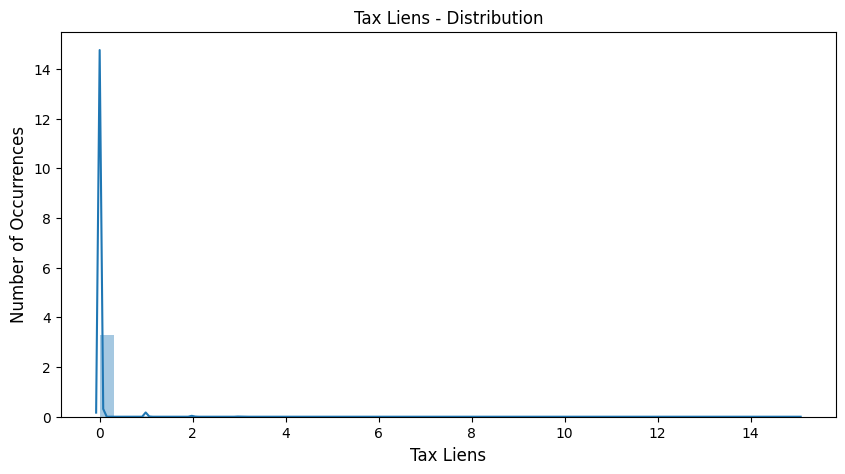

In [83]:
plt.figure(figsize=(10,5))
sns.distplot(df['Tax Liens'])
plt.title('Tax Liens - Distribution')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Tax Liens', fontsize=12)
plt.show();

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88910 entries, 0 to 88909
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan ID                       88910 non-null  object 
 1   Customer ID                   88910 non-null  object 
 2   Loan Status                   88910 non-null  object 
 3   Current Loan Amount           88910 non-null  float64
 4   Term                          88910 non-null  object 
 5   Credit Score                  88910 non-null  float64
 6   Years in current job          88910 non-null  int32  
 7   Home Ownership                88910 non-null  object 
 8   Annual Income                 88910 non-null  float64
 9   Purpose                       88910 non-null  object 
 10  Monthly Debt                  88910 non-null  float64
 11  Years of Credit History       88910 non-null  float64
 12  Months since last delinquent  88910 non-null  float64
 13  N

In [85]:
df.to_csv('../output/CleanedData.csv', index=False)

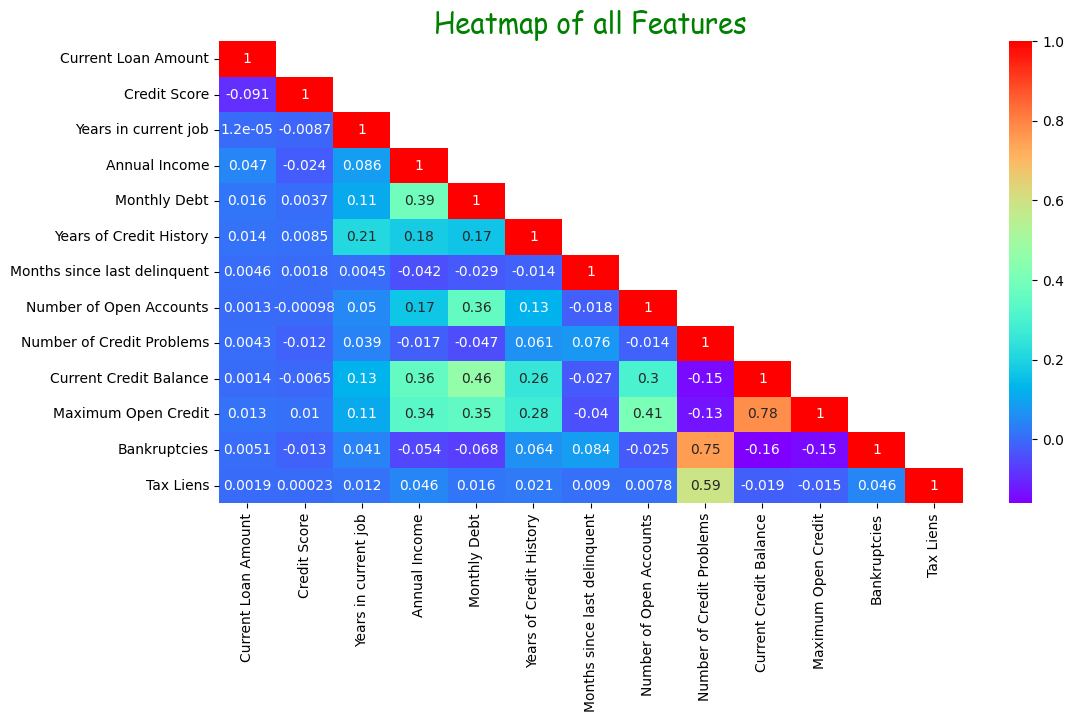

In [86]:
plt.figure(figsize=(12,6))
font = {'family':'cursive','color':'green','size':20}
sns.heatmap(df.corr(), annot=True, cmap='rainbow', mask = np.triu(df.corr(),+1));
plt.title("Heatmap of all Features",fontdict=font);
plt.show();